In [1]:
import brax
from brax.positional import pipeline
from brax.io import mjcf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import jax
from jax import numpy as jnp

In [2]:
ball = mjcf.loads(
    """<mujoco>
         <option timestep="0.005"/>
         <worldbody>
           <body pos="0 0 3">
             <joint type="free"/>
             <geom size="0.5" type="sphere"/>
           </body>
           <geom size="40 40 40" type="plane"/>
         </worldbody>
       </mujoco>
  """)

In [3]:
dir(ball)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'act_size',
 'actuator',
 'actuator_actadr',
 'actuator_actlimited',
 'actuator_actnum',
 'actuator_actrange',
 'actuator_biasprm',
 'actuator_biastype',
 'actuator_ctrllimited',
 'actuator_ctrlrange',
 'actuator_dynprm',
 'actuator_dyntype',
 'actuator_forcelimited',
 'actuator_forcerange',
 'actuator_gainprm',
 'actuator_gaintype',
 'actuator_gear',
 'actuator_trnid',
 'actuator_trntype',
 'ang_damping',
 'baumgarte_erp',
 'body_dofadr',
 'body_dofnum',
 'body_geomadr',
 'body_geomnum',
 'body_gravcomp',
 'body_inertia',
 'body_invweight0',
 'body_ipo

In [4]:
print(ball.link.inertia.mass, 4/3 * jnp.pi * 0.5**3 * 1000)

[523.59875] 523.5987755982989


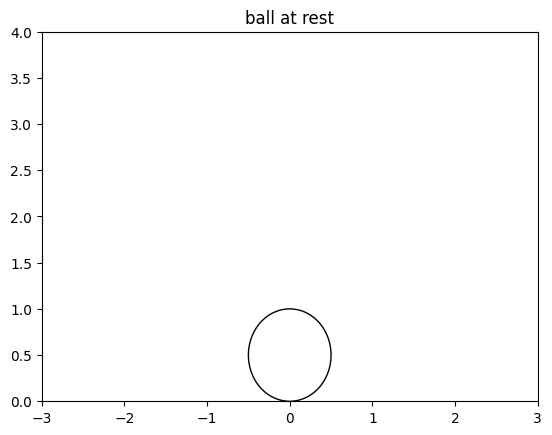

In [5]:
def visualize(ax, pos, alpha=1):
  for p, pn in zip(pos, list(pos[1:]) + [None]):
    ax.add_patch(Circle(xy=(p[0], p[2]), radius=0.5, fill=False, color=(0, 0, 0, alpha)))
    if pn is not None:
      ax.add_line(Line2D([p[0], pn[0]], [p[2], pn[2]], color=(1, 0, 0, alpha)))

_, ax = plt.subplots()
plt.xlim([-3, 3])
plt.ylim([0, 4])

visualize(ax, [[0, 0, 0.5]])
plt.title('ball at rest')
plt.show()

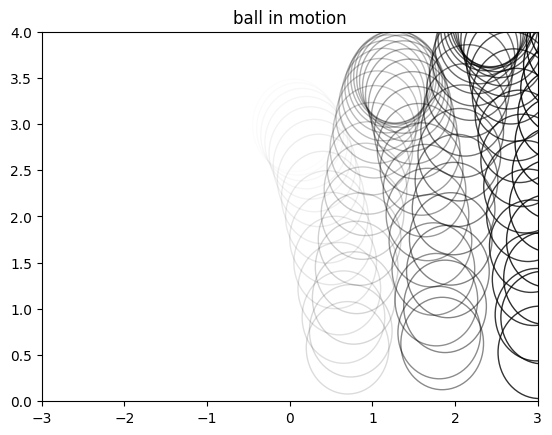

In [10]:
#@title { run: "auto"}
from brax.positional import pipeline

elasticity = 1.1 #@param { type:"slider", min: 0.5, max: 1.0, step:0.05 }
ball_velocity = 1 #@param { type:"slider", min:-5, max:5, step: 0.5 }

# change the material elasticity of the ball and the plane
ball = ball.replace(elasticity=jnp.array([elasticity] * ball.ngeom))

# provide an initial velocity to the ball
qd = jnp.array([ball_velocity, 0, 0, 0, 0, 0])
state = jax.jit(pipeline.init)(ball, ball.init_q, qd)

_, ax = plt.subplots()
plt.xlim([-3, 3])
plt.ylim([0, 4])

for i in range(1000):
  if i % 10 == 0:
    visualize(ax, state.x.pos, i / 1000.)
  state = jax.jit(pipeline.step)(ball, state, None)

plt.title('ball in motion')
plt.show()